Advanced NumPy Project: Anomaly Detection in Stock Market Data

Project Breakdown:

1️⃣ Data Preparation
Generate synthetic stock data or use real historical data.

Convert the dataset into a NumPy structured array.

2️⃣ Data Processing
Compute moving averages and volatility using NumPy.

Identify anomalies where price changes exceed a certain threshold.

3️⃣ Visualization
Plot stock price trends and highlight anomalies using matplotlib.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#define a structured dtype for the stock data
stock_dtype = np.dtype([
    ('date', 'U10'),
    ('open', 'f4'),
    ('high', 'f4'),
    ('low', 'f4'),
    ('close', 'f4'),
    ('volume', 'i4')
])

In [3]:
#generate synthetic stock data for 100 days
np.random.seed(42)

dates = np.array([f'2025-03-{i:02d}' for i in range(1, 101)], dtype='U10')
open_prices = np.cumsum(np.random.normal(0.5, 2, 100) + 100)
high_prices = open_prices + np.random.uniform(0.5, 2, 100)
low_prices = open_prices - np.random.uniform(0.5, 2, 100)
close_prices = open_prices + np.random.normal(0, 1, 100)
volumes = np.random.randint(1000, 10000, 100)

#create structured numpy array
stock_data = np.array(list(zip(dates, open_prices, high_prices, low_prices, close_prices, volumes)), dtype=stock_dtype)
print(stock_data[:5]) 

[('2025-03-01', 101.49343, 102.619545,  99.80121, 102.76034, 5748)
 ('2025-03-02', 201.7169 , 202.55006 , 200.46295, 201.00923, 5849)
 ('2025-03-03', 303.51227, 304.19208 , 302.1469 , 303.9561 , 4709)
 ('2025-03-04', 407.05835, 408.06476 , 405.81955, 407.83298, 7619)
 ('2025-03-05', 507.09003, 509.0044  , 506.29718, 506.1631 , 9647)]


In [4]:
def moving_average(data, window=5):
    return np.convolve(data, np.ones(window)/window, mode='valid')

#compute moving averages of close prices
close_prices = stock_data['close']
moving_avg = moving_average(close_prices)

#detect anomalines (price cahnges > 2 standard deviations)
std_dev = np.std(close_prices)
mean_price = np.mean(close_prices)
anomalies = np.where(np.abs(close_prices - mean_price) > 2 * std_dev)[0]

print("Anomalies detected at indices:", anomalies)

Anomalies detected at indices: []


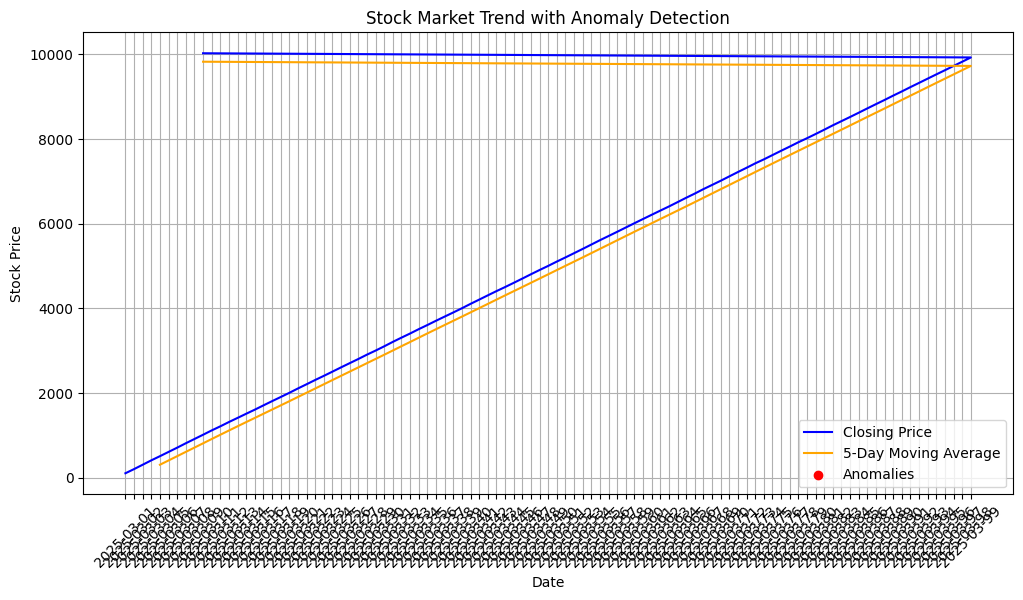

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data['date'], stock_data['close'], label="Closing Price", color='blue')
plt.plot(stock_data['date'][4:], moving_avg, label="5-Day Moving Average", color='orange')

# Mark anomalies
plt.scatter(stock_data['date'][anomalies], stock_data['close'][anomalies], color='red', label="Anomalies", zorder=3)

plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Market Trend with Anomaly Detection")
plt.legend()
plt.grid()
plt.show()
